In [1]:
import os
HOCKEY_PATH = os.path.join("datasets", "hockey")

In [2]:
import pandas as pd

def load_hockey_data(hockey_path=HOCKEY_PATH):
    csv_path = os.path.join(hockey_path, "my_csv_export_2019_3_1.csv")
    return pd.read_csv(csv_path)

In [3]:
hockey = load_hockey_data()
hockey.head()

,DataTime,Хозяева,Время Х,Гости,Время Г
0,04.10.2018,Торонто,12 38 61,Монреаль,9 39
1,04.10.2018,Вашингтон,1 2 24 26 27 35 50,Бостон,NaN
2,04.10.2018,Ванкувер,13 41 42 45 59,Калгари,43 48
3,04.10.2018,Сан-Хосе,7 37,Анахайм,1 38 48 50 59
4,05.10.2018,Баффало,NaN,Бостон,6 15 36 59


In [4]:
hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 5 columns):
DataTime    990 non-null object
Хозяева     990 non-null object
Время Х     937 non-null object
Гости       990 non-null object
Время Г     930 non-null object
dtypes: object(5)
memory usage: 38.8+ KB


In [5]:
hockey["Время Х"].unique()

array(['12 38 61', '1 2 24 26 27 35 50', '13 41 42 45 59', '7 37', nan,
       '1 7 21 35 36 42 61', '58', '27 36', '6 12 16', '27 59', '54',
       '24 24 25', '12 30 58 59', '6 48', '12', '17 21', '1 22 23 45 58',
       '8 11 27 47 52', '50 -1', '13 21 59', '12 22 39', '21 22 38', '37',
       '14 17 43 44', '9', '1 12 27 56 58', '1 17 29 49 54 58 59',
       '9 14 29 39 45 50 51 59', '9 12 25 42 58 59', '24 36 49 59',
       '1 17 27 44 56 58', '34 45 53 59', '14 24 28 29', '30 48 -1',
       '1 11 17 21 53', '24 58', '6 10 45 51 58', '10 30', '17 29 38 42',
       '8 21 31 57', '19 30 45 50 58', '5 34', '8 29 35 36', '13 57 61',
       '19 26 28 39', '7 18 22 45 51 54', '9 14 15 59', '16', '7 50 53',
       '33 39 59 63', '23 47 54', '7 9 17 24 39', '6 11 16 30 51',
       '19 24 31 36 42 50 55 59', '16 41 45 55', '1 11 18 39 41 47 53 59',
       '21 27 28 -1', '1 24', '32 37', '15 16 19 44 59', '31 33 34 37 58',
       '11 16 53 64', '1 2', '27 41 43', '44 57 59', '31 35',
      

In [6]:
hockey.describe()

,DataTime,Хозяева,Время Х,Гости,Время Г
count,990,990,937,990,930
unique,141,31,852,31,815
top,24.11.2018,Детройт,26,Сан-Хосе,46
freq,15,34,9,35,7


In [7]:
def count1P(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) < 20 and int(i) != -1:
                count += 1
    return count

In [8]:
def count2P(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) > 19 and int(i) < 40 and int(i) != -1:
                count += 1
    return count

In [9]:
def count3P(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) > 39 and int(i) < 60 and int(i) != -1:
                count += 1
    return count

In [10]:
def countOT(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) > 59 and int(i) != -1:
                count += 1
    return count

In [11]:
def countSS(list_time: list):
    count = 0
    if str(list_time) != 'nan':
        for i in list_time:
            if int(i) == -1:
                count += 1
    return count

In [12]:
hockey['1PHosts'] = hockey['Время Х'].str.split(" ").apply(count1P)

In [13]:
hockey['2PHosts'] = hockey['Время Х'].str.split(" ").apply(count2P)

In [14]:
hockey['3PHosts'] = hockey['Время Х'].str.split(" ").apply(count3P)

In [15]:
hockey['OTHosts'] = hockey['Время Х'].str.split(" ").apply(countOT)

In [16]:
hockey['SSHosts'] = hockey['Время Х'].str.split(" ").apply(countSS)

In [17]:
hockey['CountHosts'] = hockey['SSHosts'] + hockey['OTHosts'] + hockey['3PHosts'] + hockey['2PHosts'] + hockey['1PHosts'] 

In [18]:
hockey.describe()

,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.958586,1.085859,1.062626,0.068687,0.029293,3.205051
std,0.974551,1.032193,1.083061,0.253049,0.168712,1.793533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,6.000000,6.000000,5.000000,1.000000,1.000000,9.000000


In [19]:
hockey.head()

,DataTime,Хозяева,Время Х,Гости,Время Г,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts
0,04.10.2018,Торонто,12 38 61,Монреаль,9 39,1,1,0,1,0,3
1,04.10.2018,Вашингтон,1 2 24 26 27 35 50,Бостон,NaN,2,4,1,0,0,7
2,04.10.2018,Ванкувер,13 41 42 45 59,Калгари,43 48,1,0,4,0,0,5
3,04.10.2018,Сан-Хосе,7 37,Анахайм,1 38 48 50 59,1,1,0,0,0,2
4,05.10.2018,Баффало,NaN,Бостон,6 15 36 59,0,0,0,0,0,0


In [20]:
hockey.head(-1)

,DataTime,Хозяева,Время Х,Гости,Время Г,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts
0,04.10.2018,Торонто,12 38 61,Монреаль,9 39,1,1,0,1,0,3
1,04.10.2018,Вашингтон,1 2 24 26 27 35 50,Бостон,NaN,2,4,1,0,0,7
2,04.10.2018,Ванкувер,13 41 42 45 59,Калгари,43 48,1,0,4,0,0,5
3,04.10.2018,Сан-Хосе,7 37,Анахайм,1 38 48 50 59,1,1,0,0,0,2
4,05.10.2018,Баффало,NaN,Бостон,6 15 36 59,0,0,0,0,0,0
5,05.10.2018,Питтсбург,1 7 21 35 36 42 61,Вашингтон,3 4 8 23 53 53,2,3,1,1,0,7
6,05.10.2018,Каролина,58,Айлендерс,29 61,0,0,1,0,0,1
7,05.10.2018,Детройт,27 36,Коламбус,5 33 62,0,2,0,0,0,2
8,05.10.2018,Оттава,6 12 16,Чикаго,4 10 52 61,3,0,0,0,0,3
9,05.10.2018,Рейнджерс,27 59,Нэшвилл,23 43 58,0,1,1,0,0,2


In [21]:
hockey.describe()

,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.958586,1.085859,1.062626,0.068687,0.029293,3.205051
std,0.974551,1.032193,1.083061,0.253049,0.168712,1.793533
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
max,6.000000,6.000000,5.000000,1.000000,1.000000,9.000000


In [22]:
hockey['1PGuests'] = hockey['Время Г'].str.split(" ").apply(count1P)

In [23]:
hockey['2PGuests'] = hockey['Время Г'].str.split(" ").apply(count2P)

In [24]:
hockey['3PGuests'] = hockey['Время Г'].str.split(" ").apply(count3P)

In [25]:
hockey['OTGuests'] = hockey['Время Г'].str.split(" ").apply(countOT)

In [26]:
hockey['SSGuests'] = hockey['Время Г'].str.split(" ").apply(countSS)

In [27]:
hockey['CountGuests'] = hockey['SSGuests'] + hockey['OTGuests'] + hockey['3PGuests'] + hockey['2PGuests'] + hockey['1PGuests'] 

In [28]:
hockey.head(-1)

,DataTime,Хозяева,Время Х,Гости,Время Г,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountGuests
0,04.10.2018,Торонто,12 38 61,Монреаль,9 39,1,1,0,1,0,3,1,1,0,0,0,2
1,04.10.2018,Вашингтон,1 2 24 26 27 35 50,Бостон,NaN,2,4,1,0,0,7,0,0,0,0,0,0
2,04.10.2018,Ванкувер,13 41 42 45 59,Калгари,43 48,1,0,4,0,0,5,0,0,2,0,0,2
3,04.10.2018,Сан-Хосе,7 37,Анахайм,1 38 48 50 59,1,1,0,0,0,2,1,1,3,0,0,5
4,05.10.2018,Баффало,NaN,Бостон,6 15 36 59,0,0,0,0,0,0,2,1,1,0,0,4
5,05.10.2018,Питтсбург,1 7 21 35 36 42 61,Вашингтон,3 4 8 23 53 53,2,3,1,1,0,7,3,1,2,0,0,6
6,05.10.2018,Каролина,58,Айлендерс,29 61,0,0,1,0,0,1,0,1,0,1,0,2
7,05.10.2018,Детройт,27 36,Коламбус,5 33 62,0,2,0,0,0,2,1,1,0,1,0,3
8,05.10.2018,Оттава,6 12 16,Чикаго,4 10 52 61,3,0,0,0,0,3,2,0,1,1,0,4
9,05.10.2018,Рейнджерс,27 59,Нэшвилл,23 43 58,0,1,1,0,0,2,0,1,2,0,0,3


In [29]:
new_hockey = hockey[["DataTime","Хозяева","Гости","1PHosts","2PHosts","3PHosts","OTHosts","SSHosts","CountHosts","1PGuests" ,"2PGuests","3PGuests","OTGuests","SSGuests","CountGuests"]]

In [30]:
new_hockey.head(-1)

,DataTime,Хозяева,Гости,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountGuests
0,04.10.2018,Торонто,Монреаль,1,1,0,1,0,3,1,1,0,0,0,2
1,04.10.2018,Вашингтон,Бостон,2,4,1,0,0,7,0,0,0,0,0,0
2,04.10.2018,Ванкувер,Калгари,1,0,4,0,0,5,0,0,2,0,0,2
3,04.10.2018,Сан-Хосе,Анахайм,1,1,0,0,0,2,1,1,3,0,0,5
4,05.10.2018,Баффало,Бостон,0,0,0,0,0,0,2,1,1,0,0,4
5,05.10.2018,Питтсбург,Вашингтон,2,3,1,1,0,7,3,1,2,0,0,6
6,05.10.2018,Каролина,Айлендерс,0,0,1,0,0,1,0,1,0,1,0,2
7,05.10.2018,Детройт,Коламбус,0,2,0,0,0,2,1,1,0,1,0,3
8,05.10.2018,Оттава,Чикаго,3,0,0,0,0,3,2,0,1,1,0,4
9,05.10.2018,Рейнджерс,Нэшвилл,0,1,1,0,0,2,0,1,2,0,0,3


In [31]:
new_hockey = new_hockey.rename(columns={'Хозяева': 'Hosts', 'Гости': 'Guests'})

In [32]:
new_hockey.head(-1)

,DataTime,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountGuests
0,04.10.2018,Торонто,Монреаль,1,1,0,1,0,3,1,1,0,0,0,2
1,04.10.2018,Вашингтон,Бостон,2,4,1,0,0,7,0,0,0,0,0,0
2,04.10.2018,Ванкувер,Калгари,1,0,4,0,0,5,0,0,2,0,0,2
3,04.10.2018,Сан-Хосе,Анахайм,1,1,0,0,0,2,1,1,3,0,0,5
4,05.10.2018,Баффало,Бостон,0,0,0,0,0,0,2,1,1,0,0,4
5,05.10.2018,Питтсбург,Вашингтон,2,3,1,1,0,7,3,1,2,0,0,6
6,05.10.2018,Каролина,Айлендерс,0,0,1,0,0,1,0,1,0,1,0,2
7,05.10.2018,Детройт,Коламбус,0,2,0,0,0,2,1,1,0,1,0,3
8,05.10.2018,Оттава,Чикаго,3,0,0,0,0,3,2,0,1,1,0,4
9,05.10.2018,Рейнджерс,Нэшвилл,0,1,1,0,0,2,0,1,2,0,0,3


In [33]:
new_new_hockey = new_hockey.copy()

In [34]:
new_new_hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 15 columns):
DataTime       990 non-null object
Hosts          990 non-null object
Guests         990 non-null object
1PHosts        990 non-null int64
2PHosts        990 non-null int64
3PHosts        990 non-null int64
OTHosts        990 non-null int64
SSHosts        990 non-null int64
CountHosts     990 non-null int64
1PGuests       990 non-null int64
2PGuests       990 non-null int64
3PGuests       990 non-null int64
OTGuests       990 non-null int64
SSGuests       990 non-null int64
CountGuests    990 non-null int64
dtypes: int64(12), object(3)
memory usage: 116.1+ KB


In [35]:
new_new_hockey.head(-1)

,DataTime,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountGuests
0,04.10.2018,Торонто,Монреаль,1,1,0,1,0,3,1,1,0,0,0,2
1,04.10.2018,Вашингтон,Бостон,2,4,1,0,0,7,0,0,0,0,0,0
2,04.10.2018,Ванкувер,Калгари,1,0,4,0,0,5,0,0,2,0,0,2
3,04.10.2018,Сан-Хосе,Анахайм,1,1,0,0,0,2,1,1,3,0,0,5
4,05.10.2018,Баффало,Бостон,0,0,0,0,0,0,2,1,1,0,0,4
5,05.10.2018,Питтсбург,Вашингтон,2,3,1,1,0,7,3,1,2,0,0,6
6,05.10.2018,Каролина,Айлендерс,0,0,1,0,0,1,0,1,0,1,0,2
7,05.10.2018,Детройт,Коламбус,0,2,0,0,0,2,1,1,0,1,0,3
8,05.10.2018,Оттава,Чикаго,3,0,0,0,0,3,2,0,1,1,0,4
9,05.10.2018,Рейнджерс,Нэшвилл,0,1,1,0,0,2,0,1,2,0,0,3


In [36]:
new_new_hockey['DataTime'] =  pd.to_datetime(new_new_hockey['DataTime'], format='%d-%m-%Y')

ValueError: time data '04.10.2018' does not match format '%d-%m-%Y' (match)

In [79]:
new_new_hockey.head(-1)

,DataTime,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,CountHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountGuests
0,2018-10-04,Торонто,Монреаль,1,1,0,1,0,3,1,1,0,0,0,2
1,2018-10-04,Вашингтон,Бостон,2,4,1,0,0,7,0,0,0,0,0,0
2,2018-10-04,Ванкувер,Калгари,1,0,4,0,0,5,0,0,2,0,0,2
3,2018-10-04,Сан-Хосе,Анахайм,1,1,0,0,0,2,1,1,3,0,0,5
4,2018-10-05,Баффало,Бостон,0,0,0,0,0,0,2,1,1,0,0,4
5,2018-10-05,Питтсбург,Вашингтон,2,3,1,1,0,7,3,1,2,0,0,6
6,2018-10-05,Каролина,Айлендерс,0,0,1,0,0,1,0,1,0,1,0,2
7,2018-10-05,Детройт,Коламбус,0,2,0,0,0,2,1,1,0,1,0,3
8,2018-10-05,Оттава,Чикаго,3,0,0,0,0,3,2,0,1,1,0,4
9,2018-10-05,Рейнджерс,Нэшвилл,0,1,1,0,0,2,0,1,2,0,0,3


In [80]:
new_new_hockey.to_csv(os.path.join("datasets", "hockey", "new_hockey_2019_01_18.csv"), sep=',', encoding='utf-8', index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011809080>]],
      dtype=object)

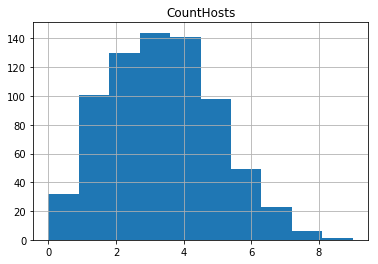

In [81]:
new_new_hockey[["DataTime","CountHosts"]].hist()

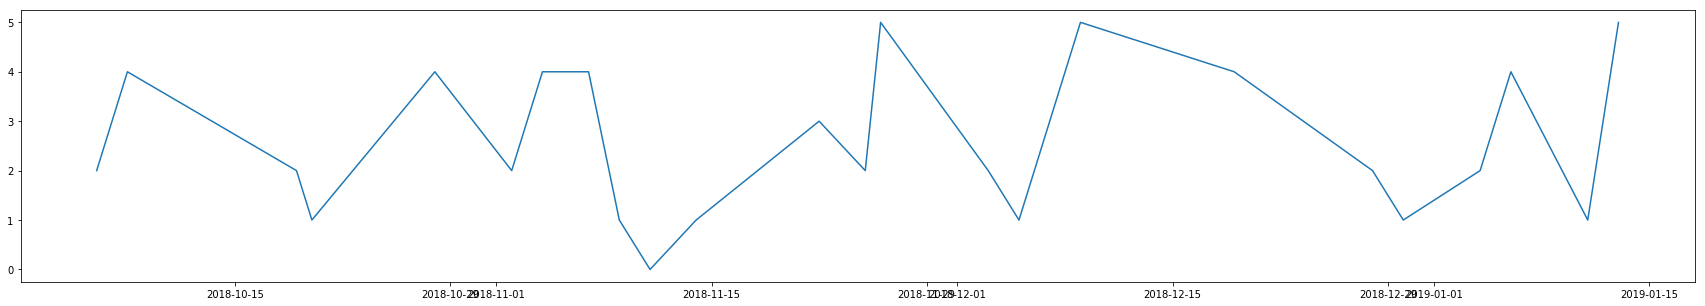

In [114]:
data = new_new_hockey[["DataTime", "CountHosts"]].where(new_new_hockey["Hosts"] == "Лос-Анджелес")
data = data.dropna()
plt.figure(figsize=(30,5))
plt.plot(data["DataTime"], data["CountHosts"])

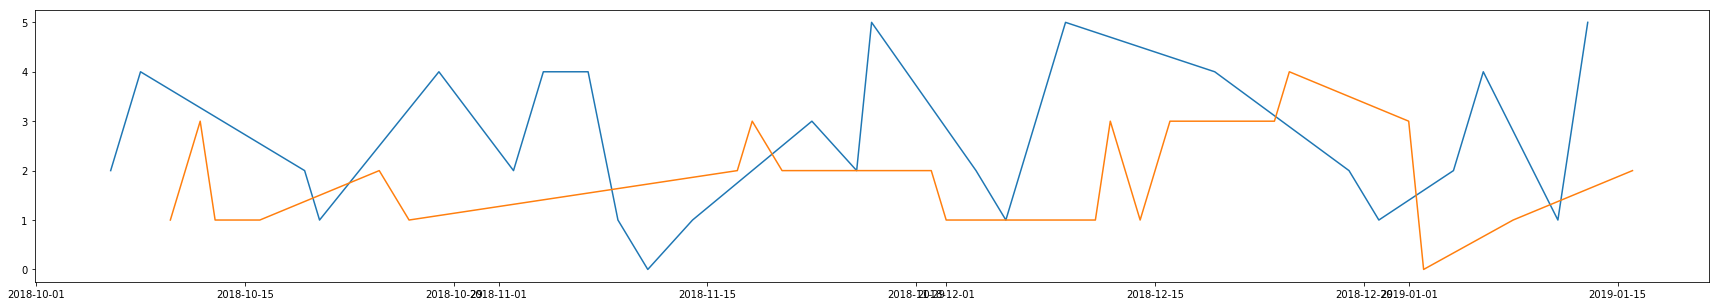

In [115]:
data = new_new_hockey[["DataTime", "CountHosts"]].where(new_new_hockey["Hosts"] == "Лос-Анджелес")
data2 = new_new_hockey[["DataTime", "CountGuests"]].where(new_new_hockey["Guests"] == "Лос-Анджелес")
data = data.dropna()
data2 = data2.dropna()
plt.figure(figsize=(30,5))
plt.plot(data["DataTime"], data["CountHosts"], data2["DataTime"] ,data2["CountGuests"])


In [116]:
new_new_hockey.to_csv(os.path.join("datasets", "hockey", "new_hockey_2019_01_18.csv"), sep=',', encoding='utf-8', index=False)